In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
def GenerateClassLabel(input_features, num_classes, add_random_noise=True, random_noise_spread=0.1):
    target_function = sum(input_features) 
    if add_random_noise:
        target_function += np.random.normal(scale=random_noise_spread)
    return int(target_function*num_classes)%num_classes

In [3]:
num_train_samples = 2000
num_train_features = 2
n_classes = 3


X_train = np.random.random(size=(num_train_samples, num_train_features))
y_train = np.array([GenerateClassLabel(x, n_classes) for x in X_train], dtype=np.int)

num_test_samples = 1000
X_test = np.random.random(size=(num_test_samples, num_train_features))
y_test = np.array([GenerateClassLabel(x, n_classes) for x in X_test], dtype=np.int)

In [4]:
X_train[0]

array([0.36364772, 0.96162107])

In [5]:
X_test[0]

array([0.78501244, 0.77362675])

In [6]:
def PlotBar(array:[int]):
    value_counts = {}
    for x in array:
        if x not in value_counts:
            value_counts[x] = 0
        value_counts[x] += 1
    bar_x_labels = sorted(value_counts)
    bar_heights = [value_counts[x] for x in bar_x_labels]
    plt.xticks(bar_x_labels)
    plt.xlabel("Class Labels")
    plt.ylabel("Number of Samples")
    plt.bar(bar_x_labels, bar_heights)

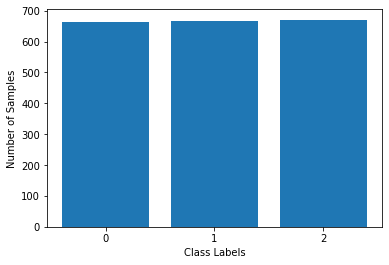

In [7]:
PlotBar(y_train)

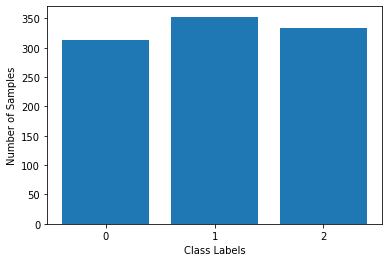

In [8]:
PlotBar(y_test)

In [9]:
random_forest_classifier = RandomForestClassifier(n_estimators=50)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [10]:
y_pred = random_forest_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.732


In [11]:
def PlotDataWithLabels(X, y):
    x0 = {}
    x1 = {}
    
    for index, value in enumerate(y):
        if value not in x0:
            x0[value] = []
            x1[value] = []
        x0[value].append(X[index][0])
        x1[value].append(X[index][1])
    for y in sorted(x0):
        plt.scatter(x0[y], x1[y], label=y, alpha=0.53)
    plt.legend()
    plt.title("Sample Data Points Colored by Class Labels")
    plt.xlabel("Feature Dimension 1")
    plt.ylabel("Feature Dimension 2")

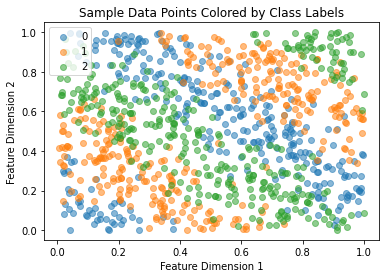

In [12]:
PlotDataWithLabels(X_test, y_test)

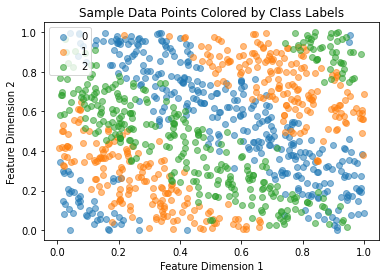

In [13]:
PlotDataWithLabels(X_test, y_pred)

In [14]:
X_test_erroneous = X_test[y_test != y_pred]
y_test_erroneous = y_test[y_test != y_pred]

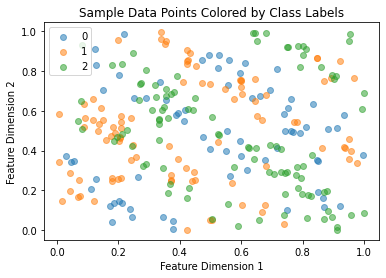

In [15]:
PlotDataWithLabels(X_test_erroneous, y_test_erroneous)

In [16]:
len(X_test_erroneous)

268

In [17]:
X_test_correct = X_test[y_test == y_pred]
y_test_correct = y_test[y_test == y_pred]

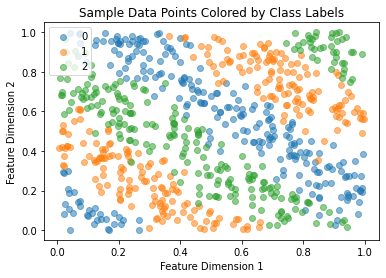

In [18]:
PlotDataWithLabels(X_test_correct, y_test_correct)

In [19]:
len(X_test_correct)

732